In [76]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [77]:
df=pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [79]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [80]:
df['experience'].fillna('zero',inplace=True)

In [81]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [82]:
df.rename(columns={'test_score(out of 10)':'marks/10'},inplace=True)

In [83]:
df

,experience,marks/10,interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [84]:
med=df['marks/10'].median()

In [85]:
df['marks/10']=df['marks/10'].fillna(med)

In [86]:
df

,experience,marks/10,interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


Finding the scattered plot

C:\Users\Aaryan\AppData\Local\Temp\ipykernel_8328\3116051561.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(df['salary($)'],df['marks/10'],df['interview_score(out of 10)'], cmap='cividis');


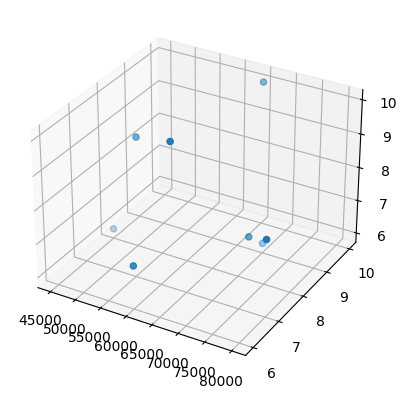

In [87]:
%matplotlib inline
from mpl_toolkits import mplot3d
ax = plt.axes(projection="3d")
ax.scatter3D(df['salary($)'],df['marks/10'],df['interview_score(out of 10)'], cmap='cividis');
# plt.xlabel('experience,marks and interview')
# plt.ylabel('salary')
# plt.scatter3D(df['experience'],df['marks/10'],df['interview_score(out of 10)'],df['salary($)'])

Prediction using multi linear regression model

In [88]:
reg=linear_model.LinearRegression()

Converting strings to numbers

In [89]:
from word2number import w2n

In [90]:
df['experience']=df['experience'].apply(w2n.word_to_num)

In [91]:
df

,experience,marks/10,interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [93]:
reg.fit(df[['experience','marks/10','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

Predicting the salary for 2 years of experience, who got 9 marks in test and 6 marks in the interview

In [97]:
reg.predict([[2,9.0,6]])

c:\Users\Aaryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

Predicting the salary for 12 years of experience, who got 10 marks in test and 10 marks in the interview

In [98]:
reg.predict([[12,10.0,10]])

c:\Users\Aaryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

Proving the mathematics behind the model

In [102]:
m=reg.coef_
m

array([2812.95487627, 1845.70596798, 2205.24017467])

In [103]:
c=reg.intercept_
c

17737.263464337688

In [104]:
y=m[0]*12+m[1]*10.0+m[2]*10+c
y

92002.18340611353